<a href="https://colab.research.google.com/github/saran2811/task-7/blob/main/saran_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [63]:
df_train=pd.read_csv("/content/trainKNN.txt",header=None )
df_train.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [64]:
df_test=pd.read_csv("/content/testKNN.txt",header=None)
df_test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df_test.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [65]:
df_train['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [66]:
df_train.corr()['Type of glass']

ID               0.876191
RI              -0.166670
Na               0.484154
Mg              -0.714713
Al               0.640944
Si               0.092812
K                0.029423
Ca              -0.019545
Ba               0.566769
Fe              -0.227560
Type of glass    1.000000
Name: Type of glass, dtype: float64

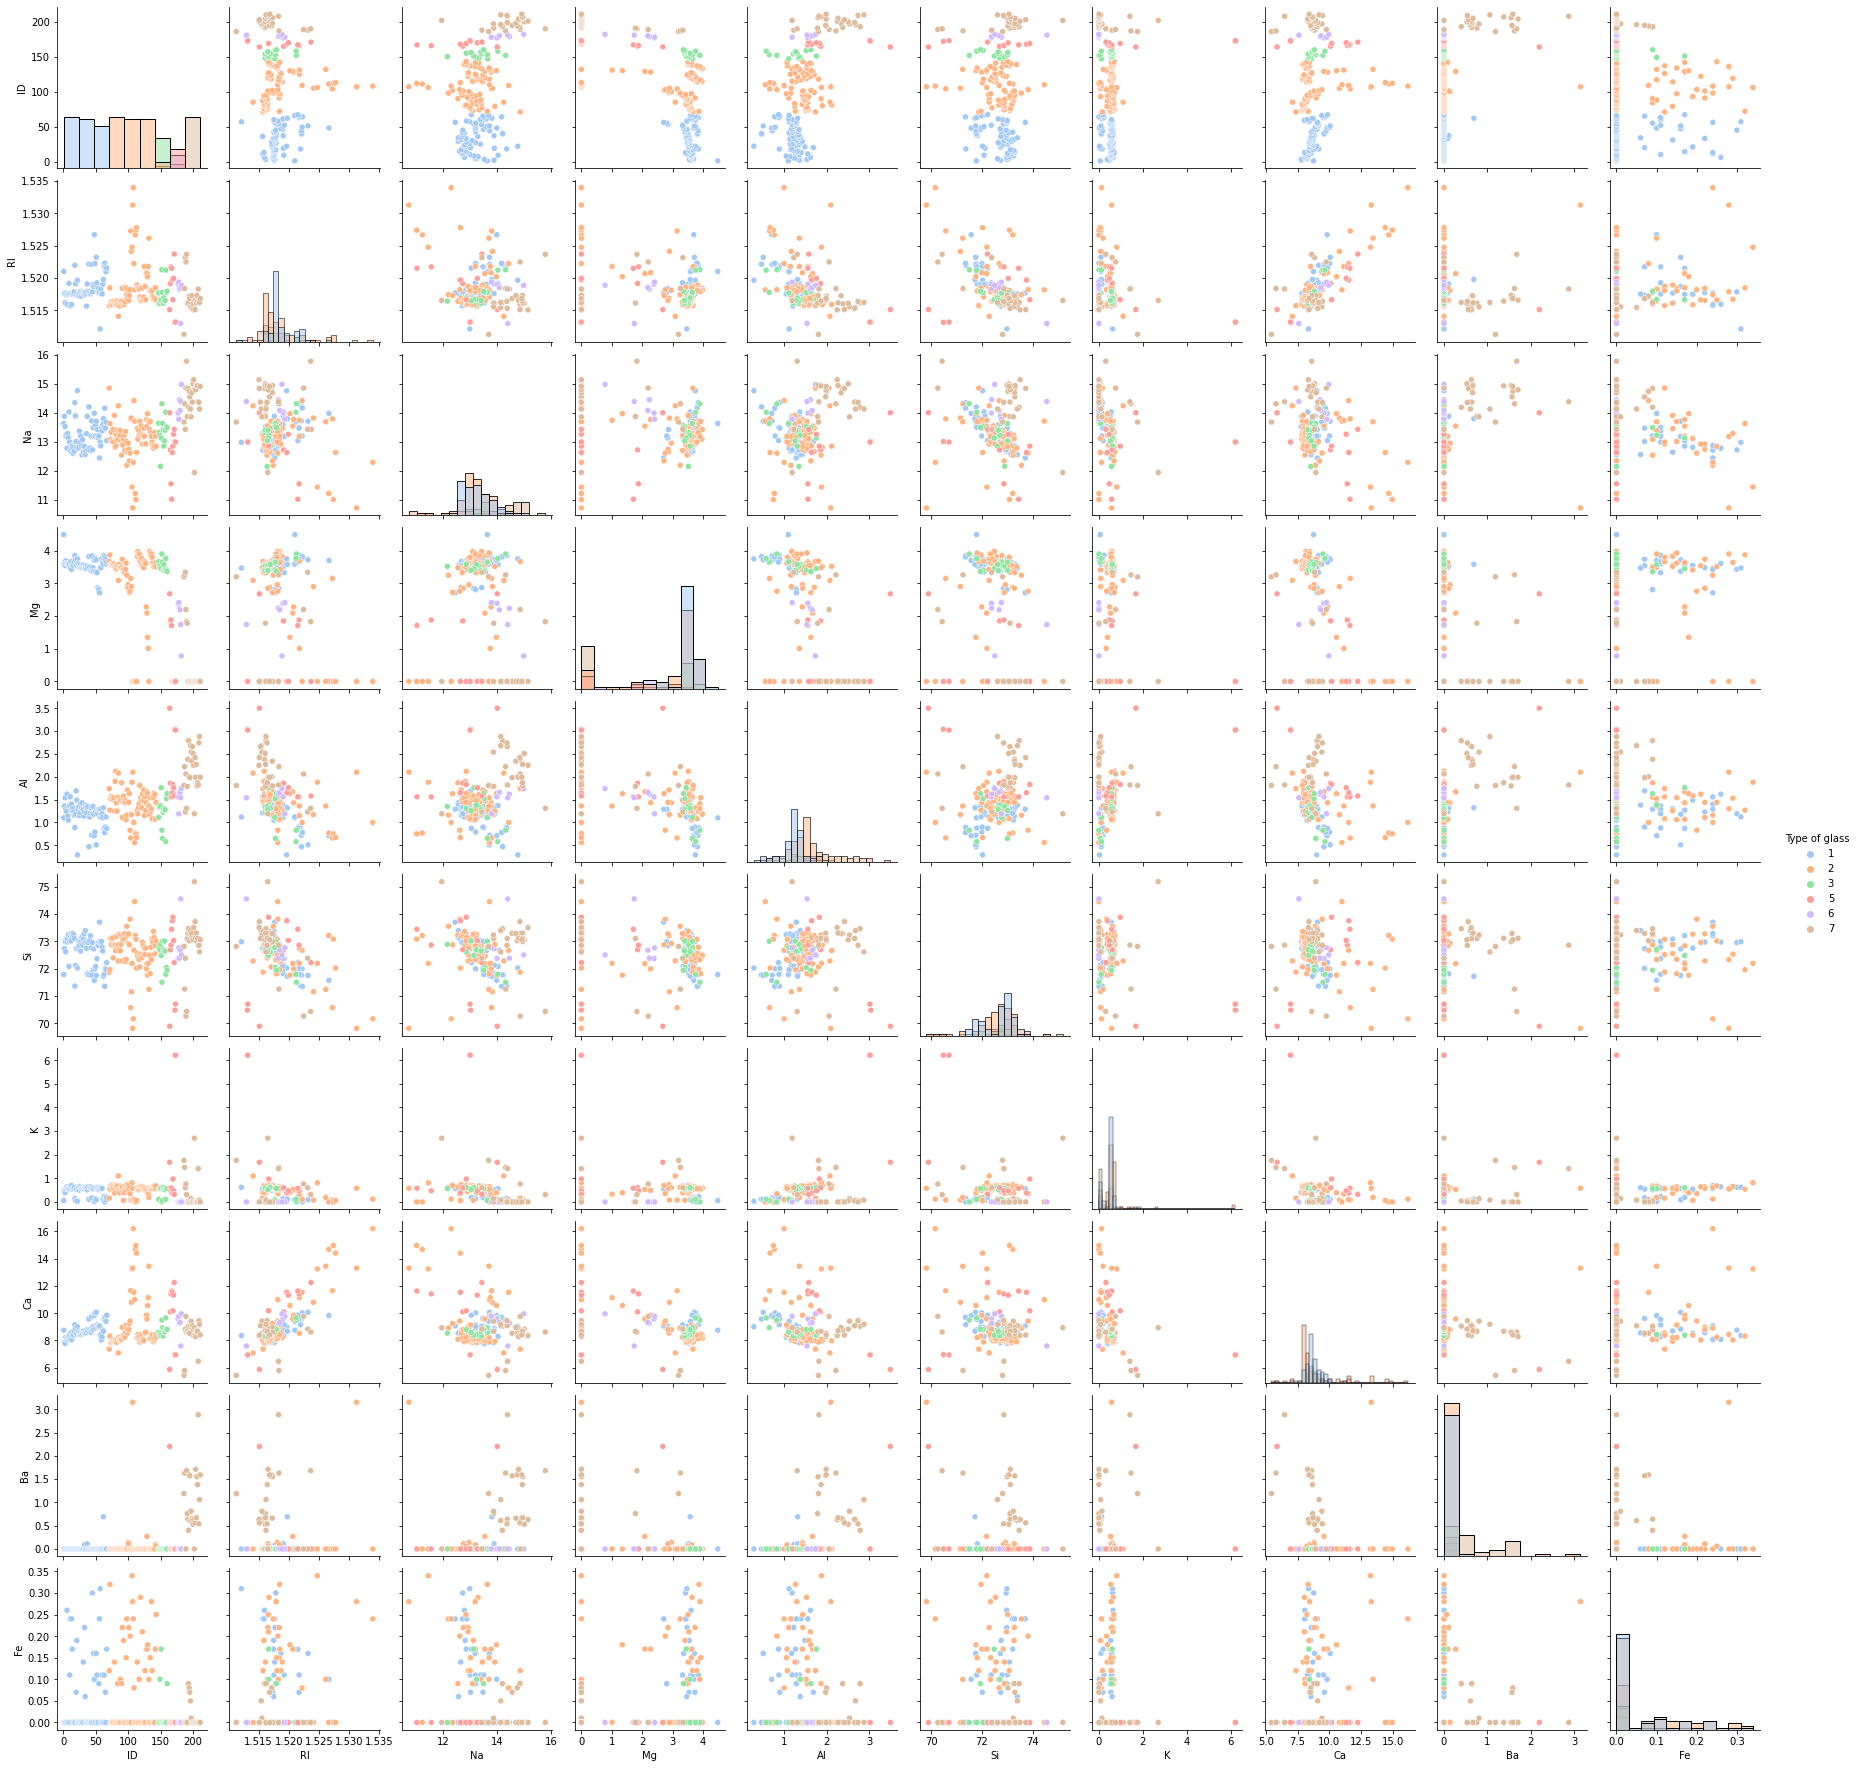

In [67]:
sns.pairplot(df_train,hue='Type of glass',diag_kind="hist", palette="pastel")

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


**Splitting Dependent and Independent data**

In [70]:
x_train=df_train.iloc[:,1:-1]
y_train=df_train['Type of glass']
x_test=df_test.iloc[:,1:-1]
y_test=df_test['Type of glass']

**feature scaling**

In [71]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Creating Model Usin KNN**

In [72]:
Knn_euc=KNeighborsClassifier(metric=distance.sqeuclidean)
Knn_man=KNeighborsClassifier(metric='manhattan')

In [76]:
Knn_euc.fit(x_train,y_train)


KNeighborsClassifier(metric=<function sqeuclidean at 0x7f49fa2af790>)

In [77]:
Knn_man.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

Making prediction using Test Data set

$\color{blue}{\text{Eucledian distance accuracy}}$

In [84]:
y_pred_euc=Knn_euc.predict(x_test)
acc_euc=accuracy_score(y_test,y_pred_euc)*100
acc_euc

61.111111111111114

$\color{blue}{\text{Manhattan distance accuracy}}$

In [85]:
y_pred_man=Knn_man.predict(x_test)
acc_man=accuracy_score(y_test,y_pred_man)*100
acc_man

61.111111111111114

**Calssification Reports for Eucledian and Manhattan**

In [94]:
print('SEucledian Accuracy : ',acc_euc,'\n')
print(classification_report(y_test,y_pred_euc),'\n\n')
print("==========================================================")
print('Manhatten Accuracy : ',acc_man,'\n')
print(classification_report(y_test,y_pred_man),'\n\n')

SEucledian Accuracy :  61.111111111111114 

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.56        18
weighted avg       0.61      0.61      0.56        18
 


Manhatten Accuracy :  61.111111111111114 

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.8